In [17]:
import pandas as pd

In [19]:
df=pd.read_csv('/content/student_performance_data.csv')
df.head()

,StudentID,Gender,Age,StudyHoursPerWeek,AttendanceRate,GPA,Major,PartTimeJob,ExtraCurricularActivities
0,1,Male,24,37,90.75,3.47,Arts,Yes,No
1,2,Female,22,37,74.90,2.32,Education,No,No
2,3,Male,22,10,53.36,2.38,Business,No,No
3,4,Male,24,10,70.26,3.46,Science,Yes,No
4,5,Male,18,19,74.87,2.31,Education,Yes,No


In [33]:
dataset= df.sample(n=7, random_state=42).reset_index(drop=True)

In [35]:
def classify_age(age):
    if age < 20:
        return 'Age_Under_20'
    elif age < 30:
        return 'Age_20_29'
    else:
        return 'Age_30_plus'

In [36]:
def classify_study_hours(h):
    if h < 5:
        return 'Low_Study_Hours'
    elif h < 15:
        return 'Medium_Study_Hours'
    else:
        return 'High_Study_Hours'

In [37]:
def classify_gpa(g):
    if g < 2.5:
        return 'Low_GPA'
    elif g < 3.5:
        return 'Medium_GPA'
    else:
        return 'High_GPA'

##Step 3: Build the Graph

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

In [38]:
G = nx.DiGraph()

for idx, row in dataset.iterrows():
    student_node = f"Student_{idx+1}"
    G.add_node(student_node, type='Student')

    gender_node = f"Gender_{row['Gender']}"
    G.add_node(gender_node, type='PersonalAttribute')
    G.add_edge(student_node, gender_node, relation='has_gender')

    age_node = classify_age(row['Age'])
    G.add_node(age_node, type='PersonalAttribute')
    G.add_edge(student_node, age_node, relation='has_age_group')

    study_node = classify_study_hours(row['StudyHoursPerWeek'])
    G.add_node(study_node, type='AcademicAttribute')
    G.add_edge(student_node, study_node, relation='has_study_hours')

    gpa_node = classify_gpa(row['GPA'])
    G.add_node(gpa_node, type='AcademicAttribute')
    G.add_edge(student_node, gpa_node, relation='has_gpa')

## Step 4: Visualize the Knowledge Graph

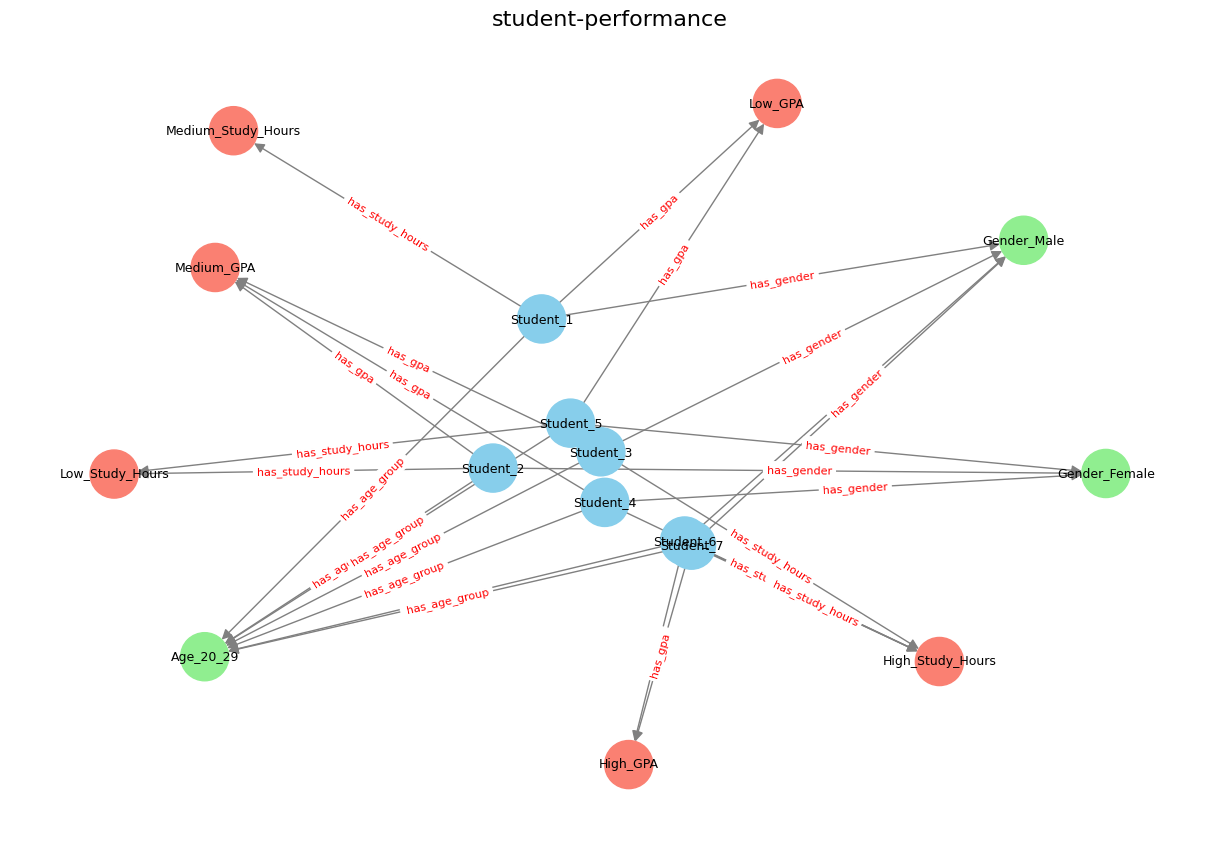

In [41]:
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)
color_map = {'Student': 'skyblue', 'PersonalAttribute': 'lightgreen', 'AcademicAttribute': 'salmon'}
node_colors = [color_map[G.nodes[n]['type']] for n in G.nodes]
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=1200, font_size=9, edge_color='gray', arrowsize=15)
edge_labels = {(u, v): d['relation'] for u, v, d in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red', font_size=8)
plt.title("student-performance", fontsize=16)
plt.show()
